In [1]:
import matplotlib.pyplot as plt
import sys
import numpy as np
import pandas
from collections import Counter
from matplotlib.patches import Rectangle
import seaborn as sns
import urllib2
import scipy.stats as stats

In [2]:
def domainlevel(domain,ll):
        domain=domain.astype(int)
        for o in range(0,np.shape(domain)[0]):
                for p in range(domain[o,0],(domain[o,1]+1)):
                        ll[p]+=1
        return ll

def getlevel(tads):
    ftads = tads[(tads[:,1]-tads[:,0]).argsort()[::-1],:]
    rtads = tads[(tads[:,1]-tads[:,0]).argsort(),:]
    flevel = np.ones(len(tads))
    rlevel = np.ones(len(tads))
    for i in range(0,len(tads)):
        rn = []
        fn = []
        for j in range(0,i):
            if rtads[i,0]<=rtads[j,0] and rtads[i,1]>=rtads[j,1]:
               rn.append(rlevel[j])
            if ftads[i,0]>=ftads[j,0] and ftads[i,1]<=ftads[j,1]:
               fn.append(flevel[j])
        if len(rn)>=1:
           rlevel[i] = max(rn)+1
        if len(fn)>=1:
           flevel[i] = max(fn)+1
    return (np.column_stack((ftads,flevel,rlevel[::-1])))

def boundarylevel(tad):
    leftb,leftl = np.unique(tad[:,0],return_counts=True)
    rightb, rightl = np.unique(tad[:,1],return_counts=True)
    allb = np.copy(leftb)
    alll = np.copy(leftl)
    for i in range(0,len(rightb)):
        ind = np.where(leftb==rightb[i])[0]
        if len(ind) > 0:
            if rightl[i]>leftl[ind[0]]:
                alll[ind[0]]=rightl[i]
        else:
            allb=np.append(allb,rightb[i])
            alll=np.append(alll,rightl[i])
    return (allb,alll)

In [9]:
#####Load the FPKM file (ENCODE)####
celltype = 'Gm12878'
resn='10kb'
res = 10000
chrs_length = [249250621,243199373,198022430,191154276,180915260,171115067,159138663,146364022,141213431,135534747,135006516,133851895,115169878,107349540,102531392,90354753,81195210,78077248,59128983,63025520,48129895,51304566]
FPKM = pandas.read_table(urllib2.urlopen('http://bx.psu.edu/~lua137/OnTAD/data/gmk.merged.all.bed'),sep='\t',header=None)

In [10]:
def geneattad (peak, tadregion):#####check the number of genes at each tad level
    peaklist = np.union1d(peak[:,0]/res, peak[:,1]/res)
    return len(peaklist[np.in1d(peaklist, tadregion)])/float(len(tadregion))

In [11]:
l1t_expr = np.array([])
l2t_expr = np.array([])
l3t_expr = np.array([])
l4t_expr = np.array([])
l5t_expr = np.array([])
lsolot_expr = np.array([])


In [12]:
for chrnum in range(1,23):
        geneD = FPKM[FPKM[0]=='chr'+str(chrnum)]
        activegene = geneD.loc[geneD[4]>5,1:2].values
        OnTAD_raw = pandas.read_table(urllib2.urlopen('http://bx.psu.edu/~lua137/OnTAD/output/OnTAD/Gm12878/10kb/OnTAD_KRnorm_pen0.1_max200_hsz5_chr'+str(chrnum)+'.tad'),sep='\t',header=None)
        OnTAD_rawa = OnTAD_raw.loc[(OnTAD_raw[2]>0),:].values[:,0:2]-1
        OnTAD_rawb = np.unique(OnTAD_rawa.flatten())
        OnTAD_rawfr = getlevel(OnTAD_rawa)
        tadarea = np.asarray(domainlevel(OnTAD_rawa,[0]*(chrs_length[chrnum-1]/res+1)))
        OnTAD_rawsolo = OnTAD_rawfr[(OnTAD_rawfr[:,2]==1)&(OnTAD_rawfr[:,3]==1),0:2]
        soloarea = np.asarray(domainlevel(OnTAD_rawsolo,[0]*(chrs_length[chrnum-1]/res+1)))
        OnTAD_rawsoloa = np.intersect1d(np.where(tadarea==1)[0],np.where(soloarea==1)[0])
        OnTAD_raw1 = OnTAD_rawfr[(OnTAD_rawfr[:,2]==1)&(OnTAD_rawfr[:,3]>1),0:2]
        l1area = np.asarray(domainlevel(OnTAD_raw1,[0]*(chrs_length[chrnum-1]/res+1)))
        OnTAD_raw1a = OnTAD_rawfr[(OnTAD_rawfr[:,2]==1)&(OnTAD_rawfr[:,3]>1),0:2]
        OnTAD_raw2a = OnTAD_rawfr[OnTAD_rawfr[:,2]==2,0:2]
        OnTAD_raw3a = OnTAD_rawfr[OnTAD_rawfr[:,2]==3,0:2]
        OnTAD_raw4a = OnTAD_rawfr[OnTAD_rawfr[:,2]==4,0:2]
        OnTAD_raw5a = OnTAD_rawfr[OnTAD_rawfr[:,2]>=5,0:2]
        OnTAD_rawb = np.unique(OnTAD_rawa.flatten())
        OnTAD_raw1all = np.intersect1d(np.where(tadarea==1)[0],np.where(l1area==1)[0])
        OnTAD_raw2all = np.where(tadarea==2)[0]
        OnTAD_raw3all = np.where(tadarea==3)[0]
        OnTAD_raw4all = np.where(tadarea==4)[0]
        OnTAD_raw5all = np.where(tadarea>=5)[0]

        OnTAD_raw1tad = np.setdiff1d(OnTAD_raw1all,OnTAD_rawb)
        l1t_expr = np.append(l1t_expr,geneattad(activegene,OnTAD_raw1tad))
        OnTAD_raw2tad = np.setdiff1d(OnTAD_raw2all,OnTAD_rawb)
        l2t_expr = np.append(l2t_expr,geneattad(activegene,OnTAD_raw2tad))
        OnTAD_raw3tad = np.setdiff1d(OnTAD_raw3all,OnTAD_rawb)
        l3t_expr = np.append(l3t_expr,geneattad(activegene,OnTAD_raw3tad))
        OnTAD_raw4tad = np.setdiff1d(OnTAD_raw4all,OnTAD_rawb)
        l4t_expr = np.append(l4t_expr,geneattad(activegene,OnTAD_raw4tad))
        OnTAD_raw5tad = np.setdiff1d(OnTAD_raw5all,OnTAD_rawb)
        l5t_expr = np.append(l5t_expr,geneattad(activegene,OnTAD_raw5tad))
        OnTAD_rawsolotad = np.setdiff1d(OnTAD_rawsoloa,OnTAD_rawb)
        lsolot_expr = np.append(lsolot_expr,geneattad(activegene,OnTAD_rawsolotad))
        OnTAD_rawnob = np.where(tadarea==0)[0]
        
        
        
        print 'done with chr'+str(chrnum)

done with chr1
done with chr2
done with chr3
done with chr4
done with chr5
done with chr6
done with chr7
done with chr8
done with chr9
done with chr10
done with chr11
done with chr12
done with chr13
done with chr14
done with chr15
done with chr16
done with chr17
done with chr18
done with chr19
done with chr20
done with chr21
done with chr22


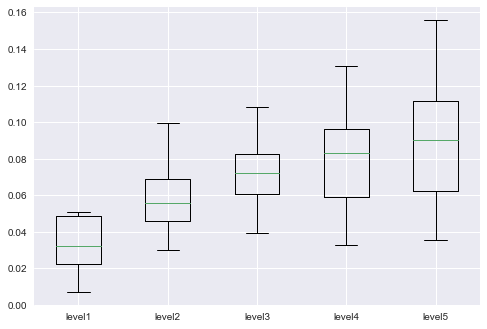

In [13]:
###Plot Fig 4c###
plt.figure(6)
fig,ax = plt.subplots(1)
ax.boxplot([l1t_expr,l2t_expr,l3t_expr,l4t_expr,l5t_expr],labels=['level1','level2','level3','level4','level5'],showfliers=False)
plt.show()

In [14]:
###test the significance between RNA expr and boundary categories####
stats.f_oneway(l1t_expr,l2t_expr,l3t_expr,l4t_expr,l5t_expr)

F_onewayResult(statistic=2.4595464040494925, pvalue=0.049898246314795731)